In [1]:
import pandas as pd
import numpy as np
import sqlite3

test_set = pd.read_csv('sets/Set 0.csv')
set_1 = pd.read_csv('sets/Set 1.csv')
set_2 = pd.read_csv('sets/Set 2.csv')
set_3 = pd.read_csv('sets/Set 3.csv')
set_4 = pd.read_csv('sets/Set 4.csv')

sets = [test_set, set_1, set_2, set_3, set_4]
full_sets = pd.concat(sets)

In [2]:
def string_to_array_serie(serie):
    return [[int(i) for i in t.replace("[", "").replace("]", "").split()] for t in serie]

full_sets["Senado"] = string_to_array_serie(full_sets["Senado"])
full_sets["Referenda"] = string_to_array_serie(full_sets["Referenda"])

In [3]:
labels_sen = ["Health", "Foreign affairs", "Environment", "Education", "Security", "Labor", "Agriculture", "Science", "Social", "Industry", "Economy", "Executive Branch organization", "Taxes", "Mines and energy", "Justice"]
labels_minist = ["Health", "Foreign Affairs", "Environment", "Education", "Security", "Labor", "Transports", "Agriculture", "Science", "Social", "EOP", "Economy", "Industry"]

In [4]:
full_sets["year"] = np.zeros(len(full_sets["Senado"]))
full_sets.set_index("Numero ato", inplace=True)

In [5]:
conn = sqlite3.connect('../radar_db')
c = conn.cursor()
c.execute("SELECT num_ato, data_assinatura_ato FROM Decretos")
num_date = c.fetchall()
conn.close()

In [6]:
num_date = [(nd[0].replace(".", ""), nd[1].split("/")[2])for nd in num_date]

In [7]:
for nd in num_date:
    if int(nd[0]) in full_sets.index:
        full_sets.loc[int(nd[0]), "year"] = nd[1]
    else:
        print("Not found: ", nd)
full_sets

Not found:  ('10086', '2019')
Not found:  ('10087', '2019')
Not found:  ('10179', '2019')
Not found:  ('10172', '2019')
Not found:  ('10162', '2019')
Not found:  ('10135', '2019')
Not found:  ('10125', '2019')
Not found:  ('10113', '2019')
Not found:  ('10112', '2019')
Not found:  ('10056', '2019')
Not found:  ('10039', '2019')
Not found:  ('9919', '2019')
Not found:  ('9908', '2019')
Not found:  ('9838', '2019')
Not found:  ('9822', '2019')
Not found:  ('9758', '2019')
Not found:  ('9756', '2019')
Not found:  ('9757', '2019')
Not found:  ('9743', '2019')
Not found:  ('9742', '2019')
Not found:  ('9718', '2019')
Not found:  ('10021', '2019')
Not found:  ('9657', '2018')
Not found:  ('9606', '2018')
Not found:  ('9595', '2018')
Not found:  ('9554', '2018')
Not found:  ('9549', '2018')
Not found:  ('9536', '2018')
Not found:  ('9524', '2018')
Not found:  ('9521', '2018')
Not found:  ('9502', '2018')
Not found:  ('9490', '2018')
Not found:  ('9469', '2018')
Not found:  ('9449', '2018')
No

,Ementa + texto completo,Senado,Referenda,year
Numero ato,,,,
10091,promulga o acordo entre o governo da república...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2019
10075,altera o decreto n 5294 de 1 de dezembro de 20...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",2019
10076,altera o decreto n 9570 de 20 de novembro de 2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]",2019
10070,promulga o acordo multilateral de busca e salv...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2019
10072,altera o decreto n 9745 de 8 de abril de 2019 ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",2019
...,...,...,...,...
3336,dá nova redação aos arts 11 15 16 19 e 30 do...,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",2000
3330,dispõe sobre a redução do consumo de energia e...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",2000
3338,aprova a estrutura regimental e o quadro demon...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]",2000


In [8]:
sen_dict = {}
for l in labels_sen:
    sen_dict[l] = np.zeros(20)

for _, d in full_sets.iterrows():
    for i, l in enumerate(d["Senado"]):
        if l == 1:
            sen_dict[labels_sen[i]][int(d["year"])-2000] += 1
sen_dict

{'Health': array([ 5., 11.,  4.,  9.,  8.,  8.,  3.,  7.,  3.,  5.,  7.,  7.,  5.,
        11.,  5., 12.,  6.,  4.,  8.,  6.]),
 'Foreign affairs': array([ 74.,  70.,  99.,  37.,  76.,  98., 111.,  51., 108.,  71., 110.,
         39.,  34.,  61.,  64.,  81.,  67.,  70.,  74.,  73.]),
 'Environment': array([ 6.,  9., 12., 11.,  5.,  8., 11.,  8., 16., 16., 13.,  5.,  3.,
         3.,  3.,  4.,  6.,  8., 18., 10.]),
 'Education': array([ 7., 18., 22., 20., 20.,  9., 11., 22., 10., 14., 22., 13.,  8.,
        10.,  9.,  6.,  7.,  8., 10.,  9.]),
 'Security': array([26., 23., 38., 30., 34., 16., 19., 26., 27., 34., 29., 17., 12.,
        25., 14., 19., 28., 20., 46., 46.]),
 'Labor': array([ 3., 10.,  6., 14.,  6.,  9.,  8.,  9.,  7., 13.,  8.,  3.,  4.,
         5.,  2.,  5.,  4.,  4.,  3.,  5.]),
 'Agriculture': array([17., 13., 14., 14., 16., 12., 16., 15.,  9., 21., 10.,  4.,  5.,
        12., 10., 12.,  9.,  5.,  8., 10.]),
 'Science': array([ 9., 18., 19., 15.,  9.,  9.,  6., 15.,  9

In [9]:
minist_dict = {}
for l in labels_minist:
    minist_dict[l] = np.zeros(20)

for _, d in full_sets.iterrows():
    for i, l in enumerate(d["Referenda"]):
        if l == 1:
            minist_dict[labels_minist[i]][int(d["year"])-2000] += 1
minist_dict

{'Health': array([14., 21., 15., 14.,  8., 10., 10., 10.,  6.,  8., 14., 11.,  6.,
        16.,  8., 10., 10.,  3.,  6.,  5.]),
 'Foreign Affairs': array([ 79.,  72., 106.,  40.,  81.,  93., 114.,  54., 113.,  73., 116.,
         42.,  36.,  60.,  65.,  83.,  71.,  74.,  77.,  72.]),
 'Environment': array([18., 12., 18., 12.,  7., 10., 11., 14., 18., 14., 16.,  8.,  4.,
         8.,  3., 10.,  8., 14., 17., 21.]),
 'Education': array([19., 20., 27., 31., 26., 14., 16., 33., 24., 30., 32., 26., 25.,
        20., 23., 18., 22., 21., 13.,  9.]),
 'Security': array([ 36.,  40.,  57.,  51.,  47.,  30.,  27.,  28.,  42.,  55.,  46.,
         29.,  28.,  61.,  40.,  43.,  59.,  41.,  75., 101.]),
 'Labor': array([20., 18., 18., 26., 19., 17., 26., 15., 21., 19., 18., 10., 10.,
        19.,  8., 11., 11.,  7.,  8.,  0.]),
 'Transports': array([10.,  1., 18., 10., 12.,  8.,  3.,  3.,  7.,  3.,  3.,  9.,  9.,
        19.,  4., 16., 14., 13.,  1.,  0.]),
 'Agriculture': array([14., 18., 20., 17.,

In [10]:
plt_order_sen = ["Agriculture", 
                 "Economy",
                 "Education",
                 "Environment", 
                 "Executive Branch organization", 
                 "Foreign affairs",
                 "Health",
                 "Industry", 
                 "Justice",
                 "Labor",
                 "Mines and energy",
                 "Science",
                 "Security",
                 "Social", 
                 "Taxes"]

In [11]:
plt_order_minist = ["Agriculture",
                    "Economy",
                    "Education", 
                    "Environment", 
                    "EOP",
                    "Foreign Affairs", 
                    "Health",
                    "Industry",
                    "Labor",
                    "Science",
                    "Security",
                    "Social",
                    "Transports"]

In [12]:
from matplotlib import pyplot as plt

def plot_temporal(d_dict, order):
    years = list(range(2000, 2020))


    plt.figure(dpi=120, figsize=(16,9))
    for i, k in enumerate(order):
        if(i < 10):
            plt.plot(years, d_dict[k], label=k)
        else:
            plt.plot(years, d_dict[k], label=k, linestyle='dashed')

    plt.legend(prop={'size': 14}, loc="upper left")
    plt.xticks(years, fontsize=14, rotation=45, ha='right')
    plt.yticks(fontsize=14)
    plt.xlabel("Year", fontsize=16)
    plt.ylabel("Number of decrees", fontsize=16)
    plt.grid(linestyle='dashed', linewidth=0.25, axis='x')
    plt.show()

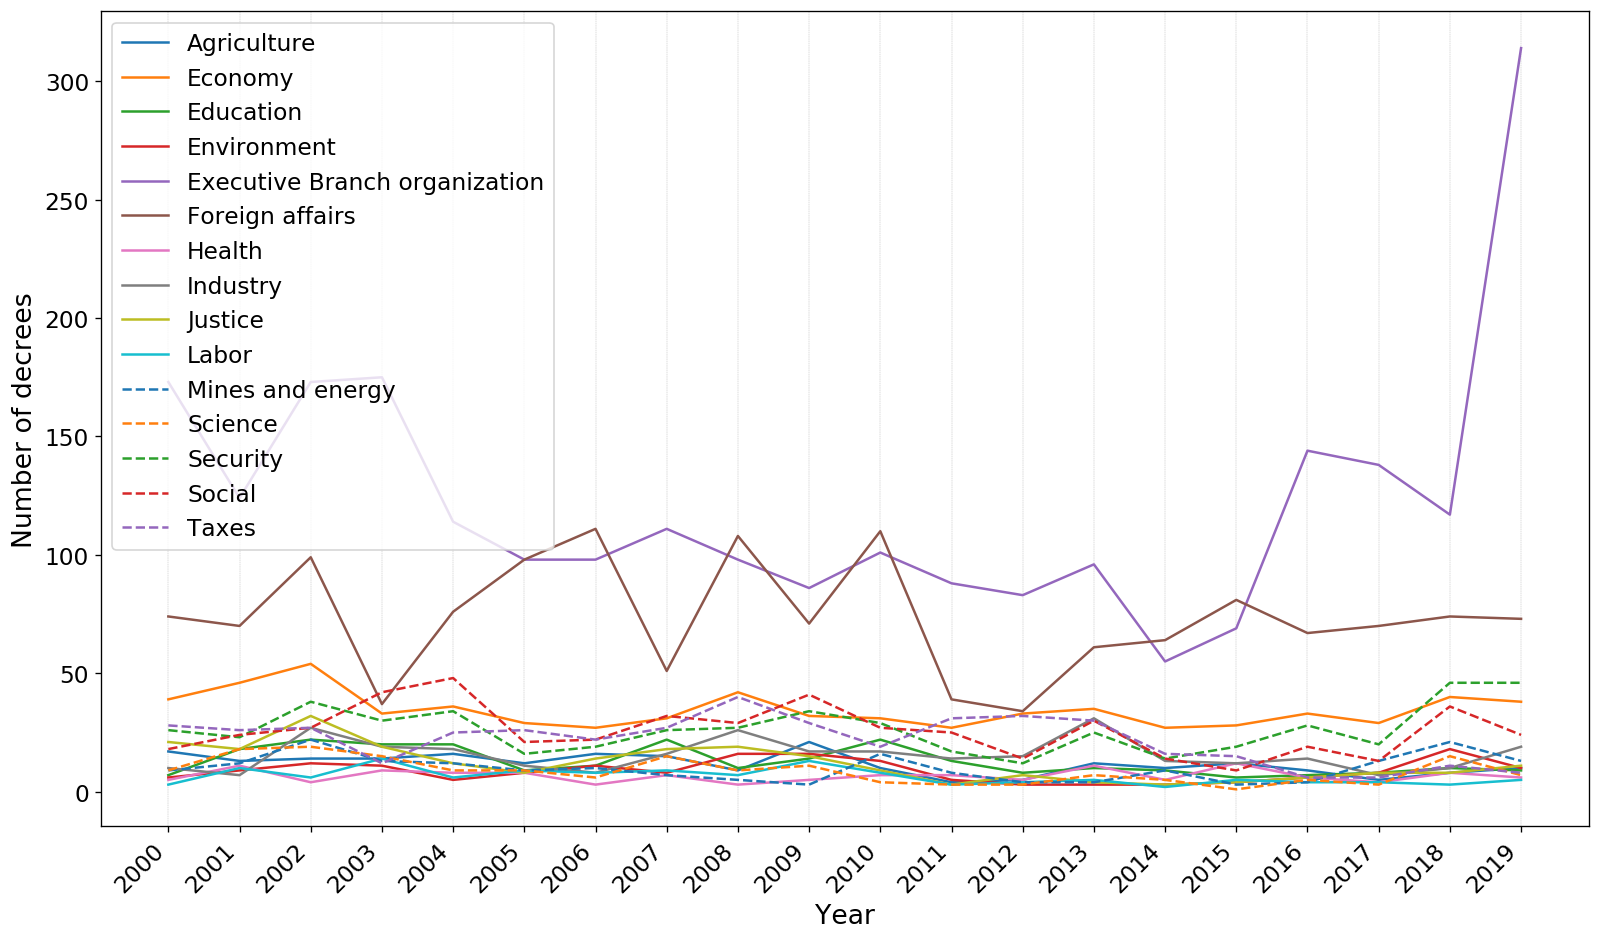

In [13]:
plot_temporal(sen_dict, plt_order_sen)

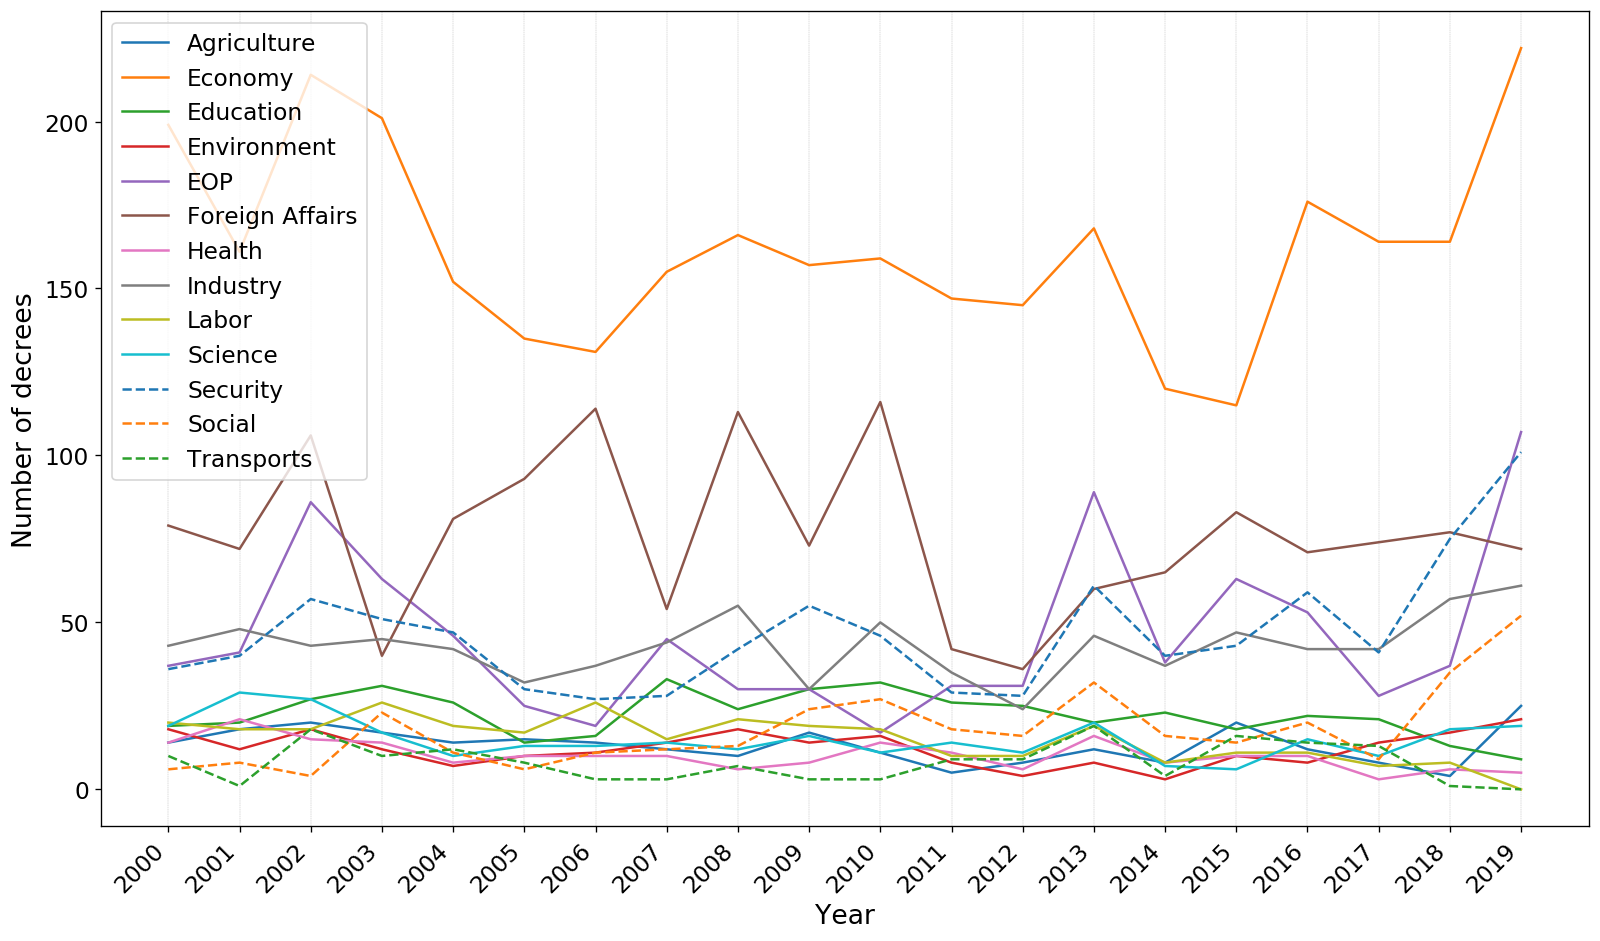

In [14]:
plot_temporal(minist_dict, plt_order_minist)